In [1]:
%matplotlib notebook

In [2]:
import ROOT as rt
from ROOT import TFile, TTree, TCanvas, TH2D, TH1F
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.22/09


In [3]:
f = TFile("selectedEventsTrueRecoBoth_withTKI_test113024.root","READ") 

t = f.Get("selectedEvents")

entries = t.GetEntries()
print(entries)

10913


In [4]:
h_trueAndReco = rt.TH1F("h_trueAndReco","Efficiency",100, -1, 1)
h_true = rt.TH1F("h_true","True",100, -1, 1)
h_reco = rt.TH1F("h_reco","Reco",100, -1, 1)

In [5]:
# making plots in terms of recoSel_delPTT_

for e in range(entries):

    t.GetEntry(e)
    
    if (t.passedSel_ == 1) or (t.passedSel_ == 3): # passes truth selection
        h_true.Fill(t.recoSel_delPTT_, t.weight_)
        if (t.passedSel_ == 2) or (t.passedSel_ == 3): # passes reco selection as well (both selections)
            h_trueAndReco.Fill(t.recoSel_delPTT_, t.weight_)
    if (t.passedSel_ == 2) or (t.passedSel_ == 3): # passes reco selection
        h_reco.Fill(t.recoSel_delPTT_, t.weight_)

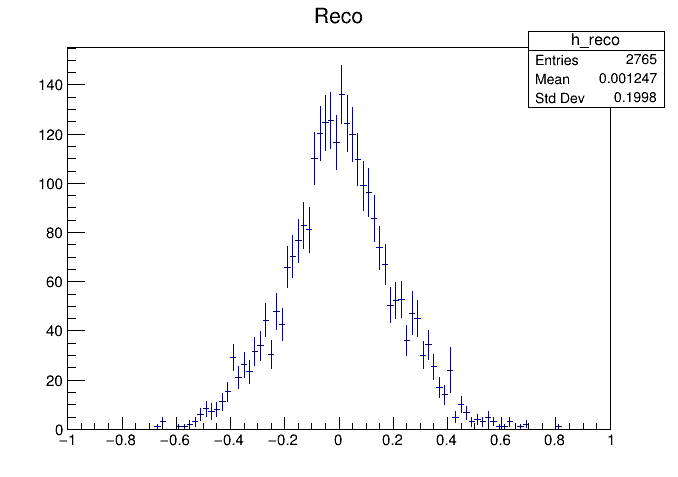

In [6]:
c1 = TCanvas("c1","c1",720,152,682,505)
c1.cd()
h_reco.Draw("")

c1.Draw()